In [1]:
# Imports
%pylab inline
import sys
sys.path.append('../../naming-games/')
from helpers import *
import pickle
from scipy.stats import linregress
import json


Populating the interactive namespace from numpy and matplotlib


In [2]:
# Load all data
batches = range(1, 4)
results = { 'beta': {}, 'pi':{}}
vals = {
    'beta': [0.1,1,10,100,100],
    'pi': ['flat','stair_up', 'stair_down', 'peak', 'lower_half', 'upper_half']}#,'lower_half', 'upper_half','peak'

for var, values in vals.items():
    for val in values:
        results[var][val] = {}
        fn = 'results/BNG04-{}-{}.pickle'.format(var, val)
        thetas, alpha_thetas, alpha_mean_theta, xs, counts = pickle.load(open(fn, 'rb'))
        results[var][val]['thetas'] = array(thetas)
        results[var][val]['alpha_thetas'] = array(alpha_thetas)
        results[var][val]['alpha_mean_theta'] = array(alpha_mean_theta)
        results[var][val]['counts'] = array(counts)
        results[var][val]['xs'] = array(xs[0])

# Distributions

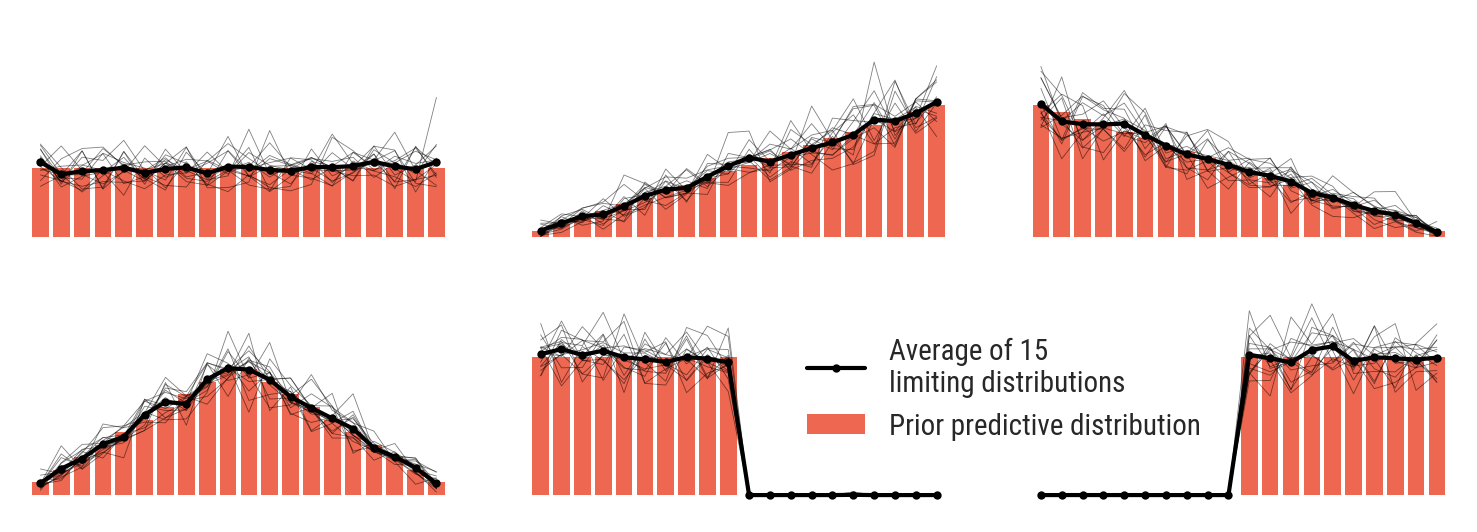

In [5]:
# plot
var = 'pi'
def show_dist(val):
    setup = json.load(open('results/BNG04-pi-{}-setup.json'.format(val)))
    alpha = array(setup['alpha'])

    vs = results[var][val]['counts'] + alpha
    ps = vs / vs.sum(axis=2)[:,:,np.newaxis]
    xs = arange(setup['K'])
    plot(xs, ps.mean(axis=1).T, 'k', lw=.2, alpha=.5)
    plot(xs, ps.mean(axis=1).mean(axis=0), 'o-k', ms=2, lw=1,
         label='Average of 15\nlimiting distributions')
    pyplot.bar(xs-.4, alpha/sum(alpha), label=r'Prior predictive distribution')

figure(figsize=cm2inch(12,4))

ax1 = subplot(231)
show_dist('flat')

ax2 = subplot(232, sharey=ax1)
show_dist('stair_up')

ax3 = subplot(233, sharey=ax1)
show_dist('stair_down')

ax4 = subplot(234, sharey=ax1)
show_dist('peak')

ax5 = subplot(235, sharey=ax1)
show_dist('lower_half')

ax6 = subplot(236, sharey=ax1)
show_dist('upper_half')

ylim(-0.005,.15)
yticks([])
for ax in [ax1,ax2,ax3,ax4,ax5,ax6]:
    sca(ax)
    xticks([])
    xlim(-.5, 19.5)

sns.despine(left=True,bottom=True)
legend(bbox_to_anchor=(.45, .85))

subplots_adjust(left=0, bottom=0, right=1, top=1)
savefig('BNG04-resulting-distributions.pdf', bbox_inches='tight')
copyfig('BNG04-resulting-distributions.pdf')